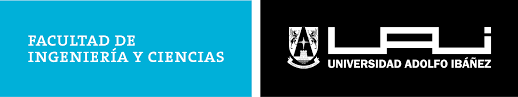


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

## **Tópicos:**
- Ejemplo completo de clasificador binario

*El set de datos para este análisis corresponde al resgistro de canciones de Spotify, donde se mustran las caracteristicas de cada canción.*

*La actividad constará de clasificar las canciones respecto a la variable target de "explicit", determinando si las canciones son explicitas en su contenido o no.*

In [3]:
# Se importan librerías necesarias
import pandas as pd
import numpy as np

In [4]:
# Se cargan datasets necesarios

df_songs = pd.read_csv("data/songs_normalize.csv", sep = ",")
# En caso de cargar los datos desde collab es necesario eliminar el "data/" que está a la izquierda del nombre del csv

In [5]:
# Se visualiza de forma tabular los datos

df_songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### **Proceso de limpieza de datos**

In [6]:
display(df_songs.info()) # Vemos si los datos están en su correcto formato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


None

In [7]:
# Verificamos la existencia de datos nulos y duplicados

display(df_songs.loc[df_songs.duplicated()].count()) # .duplicated() verifica la existencia de algún dato duplicado.

display(df_songs.isnull().sum()) # .isnull() verifica la existencia de algún dato nulo.

artist              59
song                59
duration_ms         59
explicit            59
year                59
popularity          59
danceability        59
energy              59
key                 59
loudness            59
mode                59
speechiness         59
acousticness        59
instrumentalness    59
liveness            59
valence             59
tempo               59
genre               59
dtype: int64

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
# Se procede a eliminar los datos duplicados

df_songs.drop_duplicates(inplace=True) #Elimino datos duplicados.

print(df_songs.loc[df_songs.duplicated()].count()) # .duplicated() verifica la existencia de algún dato duplicado.

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


* **Selección de variables (columnas), se escogeran aquellos datos numericos que nos aporten a la *tesis* inicial, determinar si una cancion es explicita o no en su contenido, por lo que nos detendremoa a pensar en que datos nos podrian servir**



- Descripción de la selección de las variables:

  - **'acousticness':** Una medida de 0.0 a 1.0 que detecta sonidos acústicos en una pista.

  - **'danceability':** Una medida de 0,0 a 1 que indica qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales, incluidos el tempo, la estabilidad del ritmo y la fuerza del compás. Un valor más cercano a 0,0 indica que una pista es menos bailable, y un valor más cercano a 1,0 indica que una pista es más bailable.

  - **'energy':** Una medida de 0,0 a 1,0 que refleja la intensidad de una pista. Las pistas enérgicas suelen ser rápidas, fuertes y ruidosas.

  - **'instrumentalness':** Una medida de 0,0 a 1 que refleja hasta qué punto una pista no contiene vocalizaciones. Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal.

  - **'liveness':** Una medida de 0.0 a 1.0 que detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se interprete en vivo.

  - **'tempo':** La velocidad general estimada de una pista medida en latidos por minuto (BPM).

  - **'valence':** Una medida de 0,0 a 1,0 que refleja la positividad musical que transmite una pista. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enfadadas).

**Por lo tanto, nos quedamos con las variables anteriores, las cuales nos demuestran caracteristicas respecto a la calidad de la propia canción**

***Nótese que fue necesario buscar en internet la descripcion de cada columna***

In [9]:
# Variables seleccionadas

df_songs_num = df_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'tempo', 'valence']]
df_songs_num

,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence
0,0.3000,0.751,0.834,0.000018,0.3550,95.053,0.894
1,0.0103,0.434,0.897,0.000000,0.6120,148.726,0.684
2,0.1730,0.529,0.496,0.000000,0.2510,136.859,0.278
3,0.0263,0.551,0.913,0.000013,0.3470,119.992,0.544
4,0.0408,0.614,0.928,0.001040,0.0845,172.656,0.879
...,...,...,...,...,...,...,...
1995,0.0427,0.842,0.734,0.000000,0.1060,137.958,0.952
1996,0.1170,0.552,0.702,0.000021,0.1050,169.994,0.564
1997,0.0669,0.847,0.678,0.000000,0.2740,97.984,0.811
1998,0.4500,0.741,0.520,0.000002,0.2220,102.998,0.347


In [10]:
df_songs_num.describe()

,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.128173,0.667814,0.721549,0.015372,0.181726,120.158442,0.552966
std,0.172584,0.140608,0.152872,0.088371,0.140910,26.990475,0.220845
min,0.000019,0.129000,0.054900,0.000000,0.021500,60.019000,0.038100
25%,0.013500,0.581000,0.624000,0.000000,0.088400,98.986000,0.390000
50%,0.055800,0.676000,0.739000,0.000000,0.124000,120.028000,0.560000
75%,0.176000,0.765000,0.840000,0.000069,0.242000,134.199000,0.731000
max,0.976000,0.975000,0.999000,0.985000,0.853000,210.851000,0.973000


In [11]:
# Librerias para graficar

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

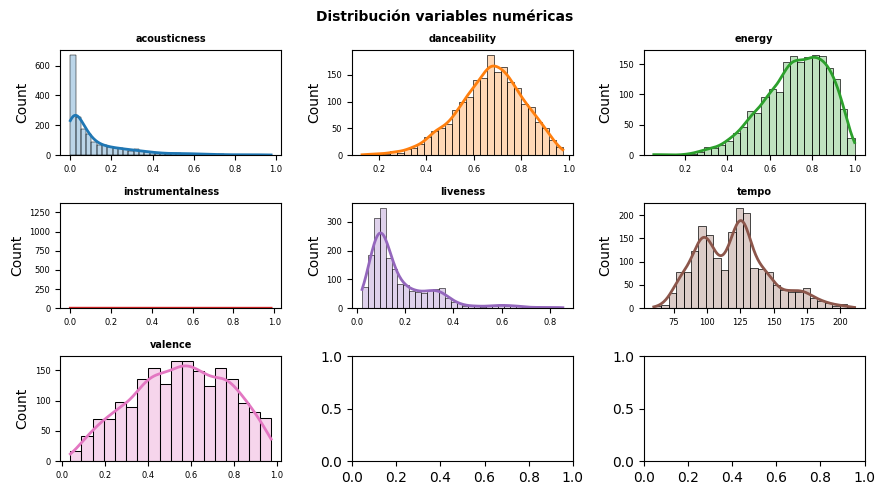

In [12]:
#Visualización

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat


for i, colum in enumerate(df_songs_num):
    sns.histplot(
        data    = df_songs_num,
        x       = colum,  
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### **Proceso de clasificación**

In [18]:
# Estandarización de los datos, antes de considerar los datos en un modelo de clasificación se recomienda
# estandarizar los datos para favorecer el proceso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(df_songs_num) # Estandarización los datos (media 0, varianza 1)

X = pd.DataFrame(scaled_features)
X


,0,1,2,3,4,5,6
0,0.995873,0.591768,0.735783,-0.173798,1.229997,-0.930399,1.544618
1,-0.683164,-1.663304,1.147999,-0.173998,3.054332,1.058704,0.593481
2,0.259809,-0.987494,-1.475793,-0.173998,0.491745,0.618917,-1.245383
3,-0.590431,-0.830990,1.252689,-0.173845,1.173208,-0.006168,-0.040610
4,-0.506393,-0.382822,1.350836,-0.162226,-0.690169,1.945541,1.476680
...,...,...,...,...,...,...,...
1936,-0.495381,1.239122,0.081470,-0.173998,-0.537549,0.659645,1.807313
1937,-0.064754,-0.823877,-0.127909,-0.173765,-0.544648,1.846889,0.049975
1938,-0.355123,1.274691,-0.284944,-0.173998,0.655012,-0.821777,1.168693
1939,1.865240,0.520630,-1.318758,-0.173976,0.285886,-0.635960,-0.932866


In [19]:
# Determinar la variable target binaria

varTarget = df_songs[["explicit"]]
varTarget

,explicit
0,False
1,False
2,False
3,False
4,False
...,...
1995,False
1996,False
1997,False
1998,False


In [20]:
# Convertir a Bool variable target, notar que es importante que el valor True haga referencia al valor que se busca predecir

varTarget = df_songs[['explicit']]
varTarget_duo = pd.get_dummies(varTarget['explicit'])
varTarget_duo.head()

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
y = varTarget_duo[True]
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: True, Length: 1941, dtype: uint8

In [22]:
# X
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: True, Length: 1941, dtype: uint8

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(2021) # Dejamos fija una semilla

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
# Generamos arreglos que sean True en las posiciones donde hay un 1

y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [25]:
y[y==True]

5       1
6       1
19      1
23      1
27      1
       ..
1983    1
1985    1
1987    1
1991    1
1994    1
Name: True, Length: 537, dtype: uint8

In [26]:
# Modelo que vamos a entrenar

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_1)

SGDClassifier()

In [27]:
y[y==1] 

5       1
6       1
19      1
23      1
27      1
       ..
1983    1
1985    1
1987    1
1991    1
1994    1
Name: True, Length: 537, dtype: uint8

In [28]:
# Predicciones

digito = X.iloc[19]
digito = np.array(digito)
digito

array([-0.57999897,  1.80822563,  1.22651688, -0.17399795, -0.68236046,
       -0.92143061, -1.10497679])

In [29]:
# Probemos si nuestro clasificador esta reconociendo este número.
sgd_clf.predict([digito])

array([ True])

In [30]:
from sklearn.linear_model import SGDClassifier

y_pred_1 = sgd_clf.predict(X_test)

In [31]:
# Matriz de confusión

from sklearn.metrics import (confusion_matrix, accuracy_score)

cm = confusion_matrix(y_test, y_pred_1) 
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[355  83]
 [ 94  51]]


In [32]:
# Evaluacion de medidas de desempeño

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Accuaracy: {accuracy_score(y_test, y_pred_1)}") #Accuaracy

print(f"Precision: {precision_score(y_test, y_pred_1)}") #Precision

print(f"Recall: {recall_score(y_test, y_pred_1)}") #Recall


Accuaracy: 0.6963979416809606
Precision: 0.3805970149253731
Recall: 0.35172413793103446


### Información extra de utilidad:

- https://medium.com/@gurupratap.matharu/learn-to-do-image-classification-using-stochastic-gradient-descent-and-random-forest-classifier-fd9b7bc95581